## Seguindo um [tutorial](https://www.youtube.com/watch?v=ADV-AjAXHdc&ab_channel=PythonTutorialsforDigitalHumanities) do Youtube para o pre-processamento de uma imagem antes de ser aplicado o OCR

In [1]:
# Importação de bibliotecas:

import cv2
import PIL
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
from PIL import Image, ImageDraw

### 1. Abrindo um pdf e salvando em formato .jpg: (se fosse o caso)

#### Leitura e visualização do documento em pdf:

doc = convert_from_path(pdf_path = 'images/doc_exemplo.pdf',
                            dpi = 500, fmt = 'jpg', hide_annotations = True)

#### Salvando a imagem (.jpg) em um novo arquivo:

doc_pag1 = doc[0]
doc_pag1.save('images/doc_pag1.jpg')

### 2. Abrindo a imagem salva com o OpenCv:

In [48]:
caminho_imagem = 'images/exemplo.jpg'

ex = cv2.imread(caminho_imagem)

In [49]:
# Função para mostrar a imagem no seu tamanho original com o matplotlib:

def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

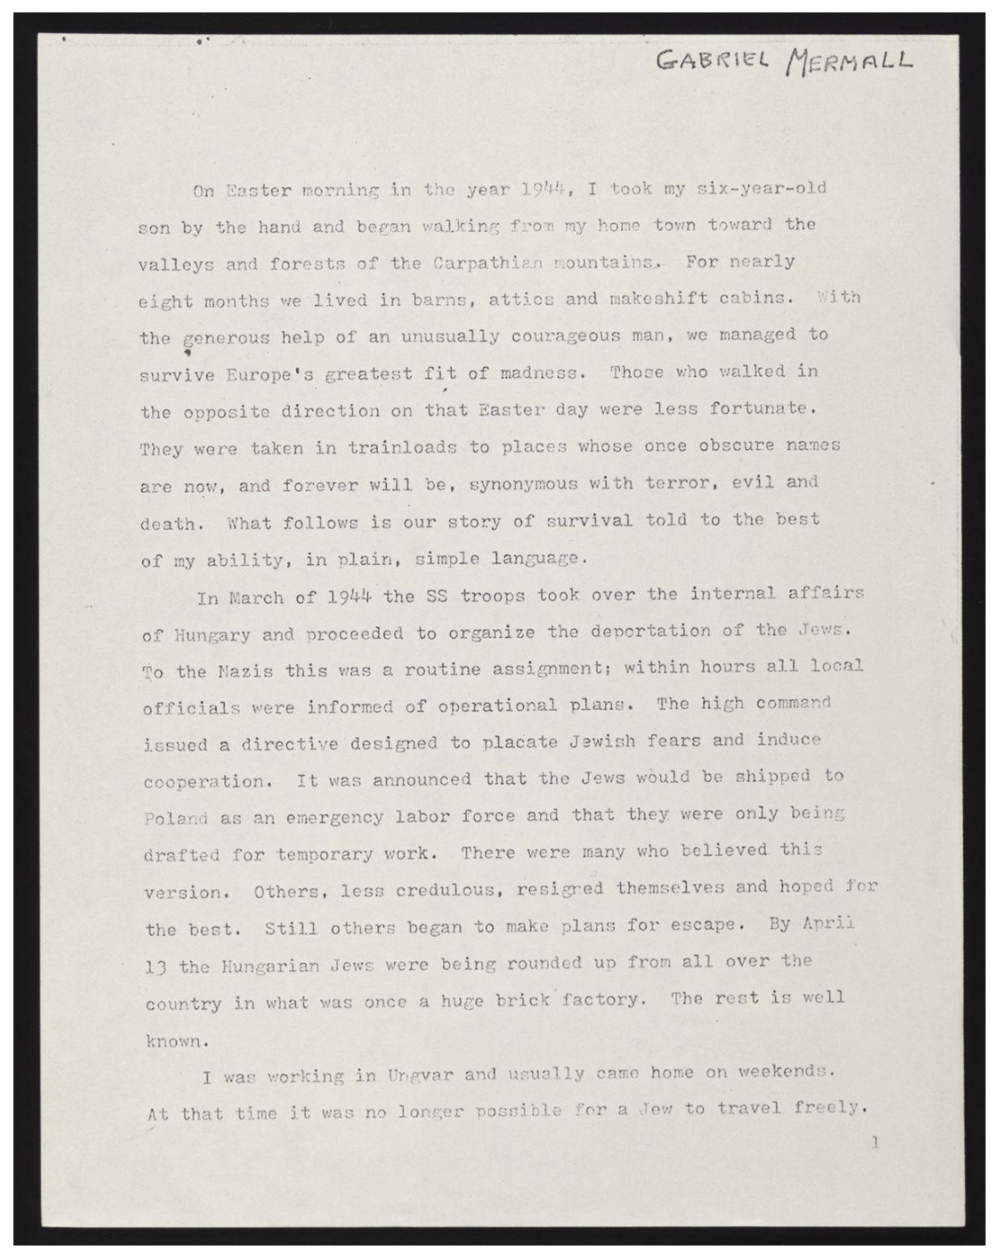

In [50]:
display(caminho_imagem)

### 3. Inverted images: o que é claro se torna escuro e vice-versa.

#### Esse nao é um passo fundamental para o processo, mas às vezes pode ser necessário.

In [51]:
ex_invertido = cv2.bitwise_not(ex)
cv2.imwrite('images/exemplo.jpg', ex_invertido)

True

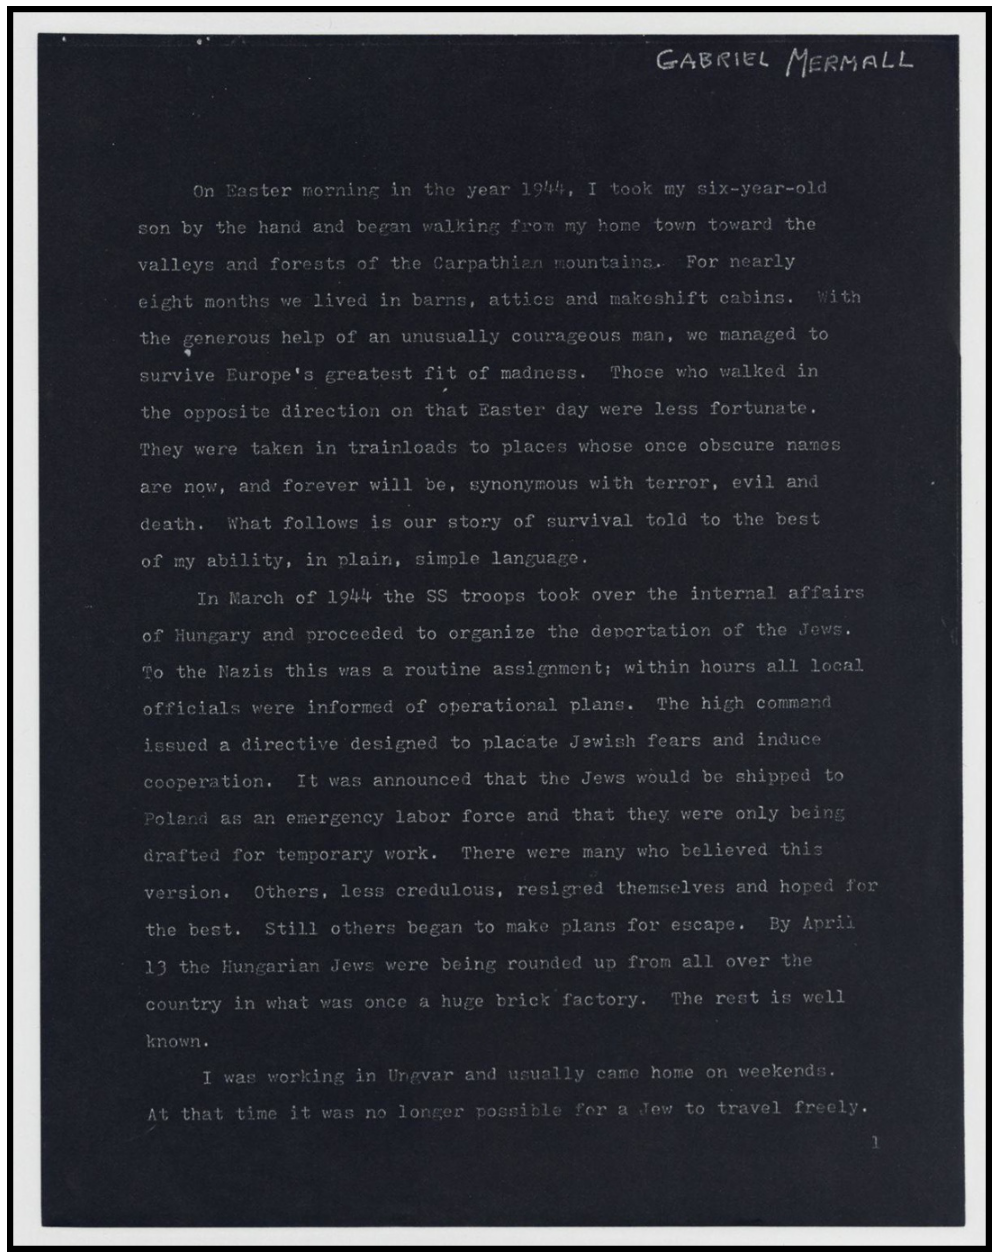

In [52]:
display('images/exemplo.jpg')

### 4. Binarização:

#### 4.1 Escala de cinza:

In [53]:
# Antes de realizar a binarização, passaremos a imagem para a escala de cinzas:

def cinza(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [54]:
# Utilizando a função para a conversão:

ex_cinza = cinza(ex)

# Salvando a imagem:

cv2.imwrite('images/ex_cinza.jpg', ex_cinza)

True

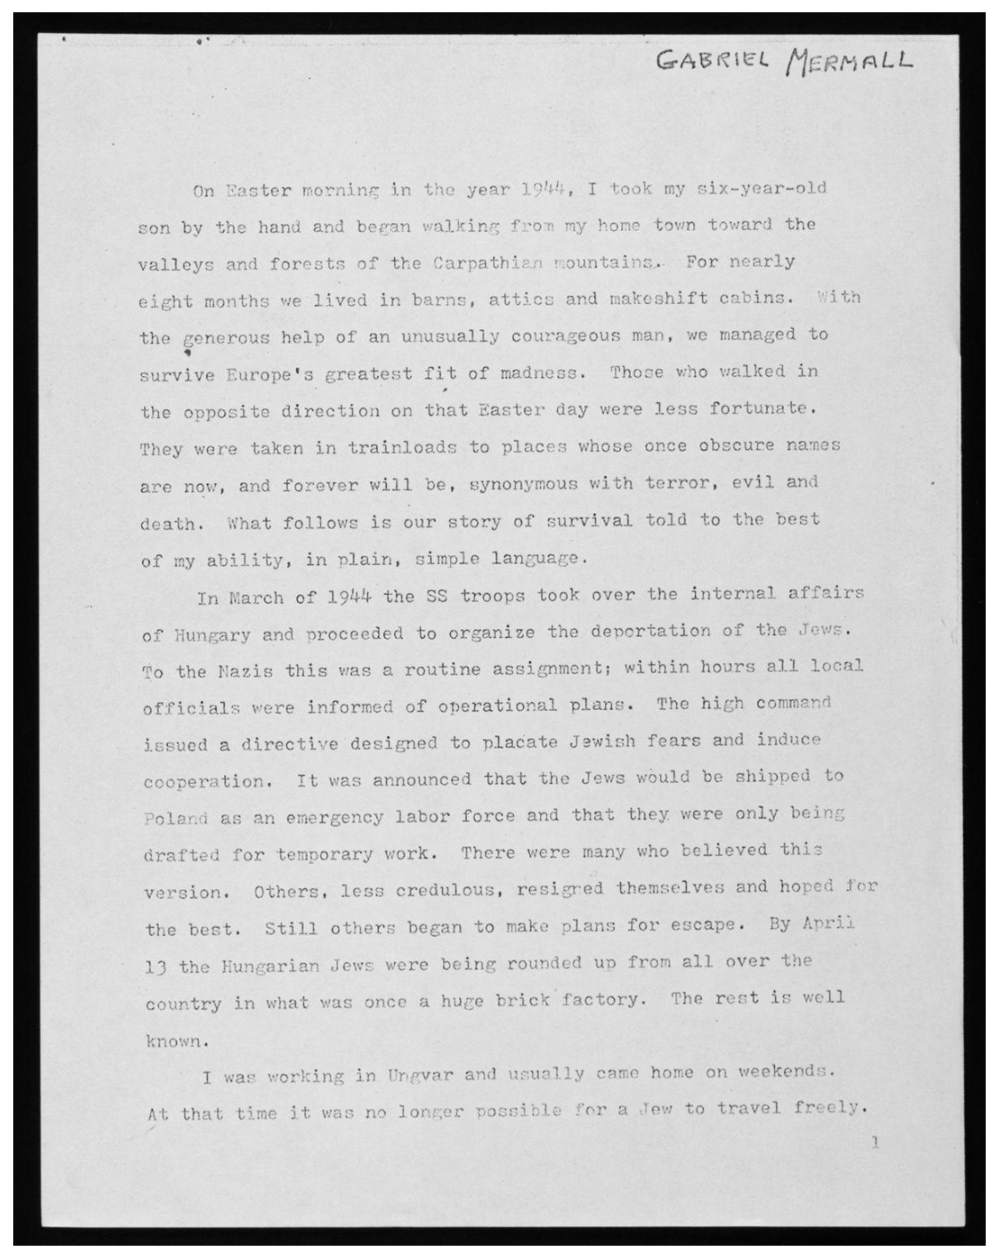

In [55]:
# Utilizando a função display para mostrar a imagem:

display('images/ex_cinza.jpg')

#### 4.2 Binarização:

In [56]:
# Binarização

thresh, ex_bw = cv2.threshold(ex_cinza, 210,230, cv2.THRESH_BINARY)

# Salvando a imagem:
cv2.imwrite('images/ex_bw.jpg', ex_bw)

True

##### Alterar os parâmetros 200, 230 mexe no contraste da imagem.

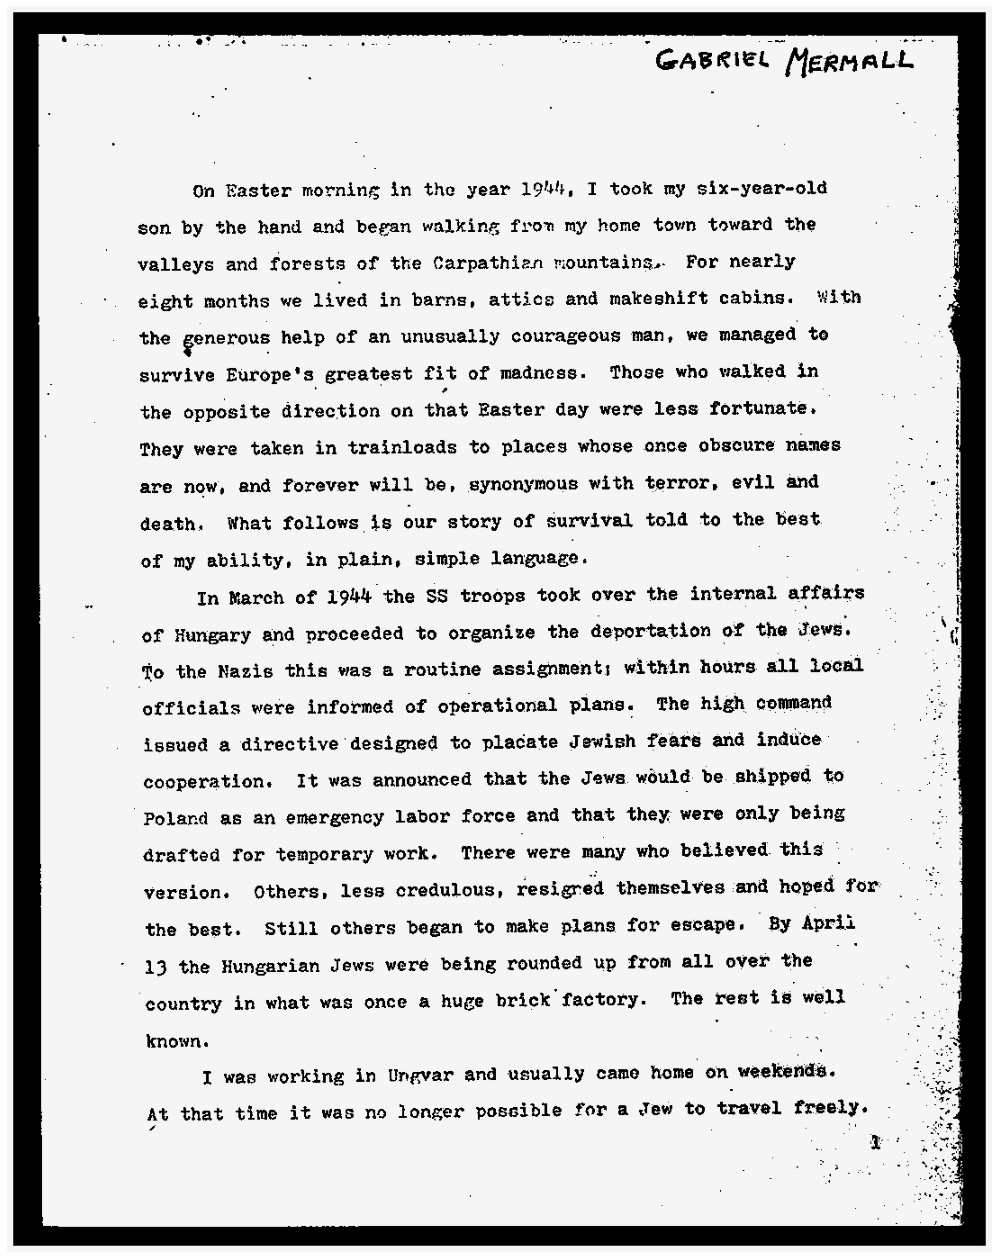

In [57]:
# Utilizando a função display para mostrar a imagem:

display('images/ex_bw.jpg')

### 5. Remoção de ruídos:

#### Nem sempre é vantajoso usar, pode reduzir a nitidez dos caracteres. Analisar caso a caso.

In [58]:
def remover_ruido(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=2)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [59]:
# Utilizando a função de remoção de ruídos na imagem bw:

ex_sem_ruido = remover_ruido(ex_bw)

# Salvando a nova imagem:

cv2.imwrite('images/ex_sem_ruido.jpg', ex_sem_ruido)

True

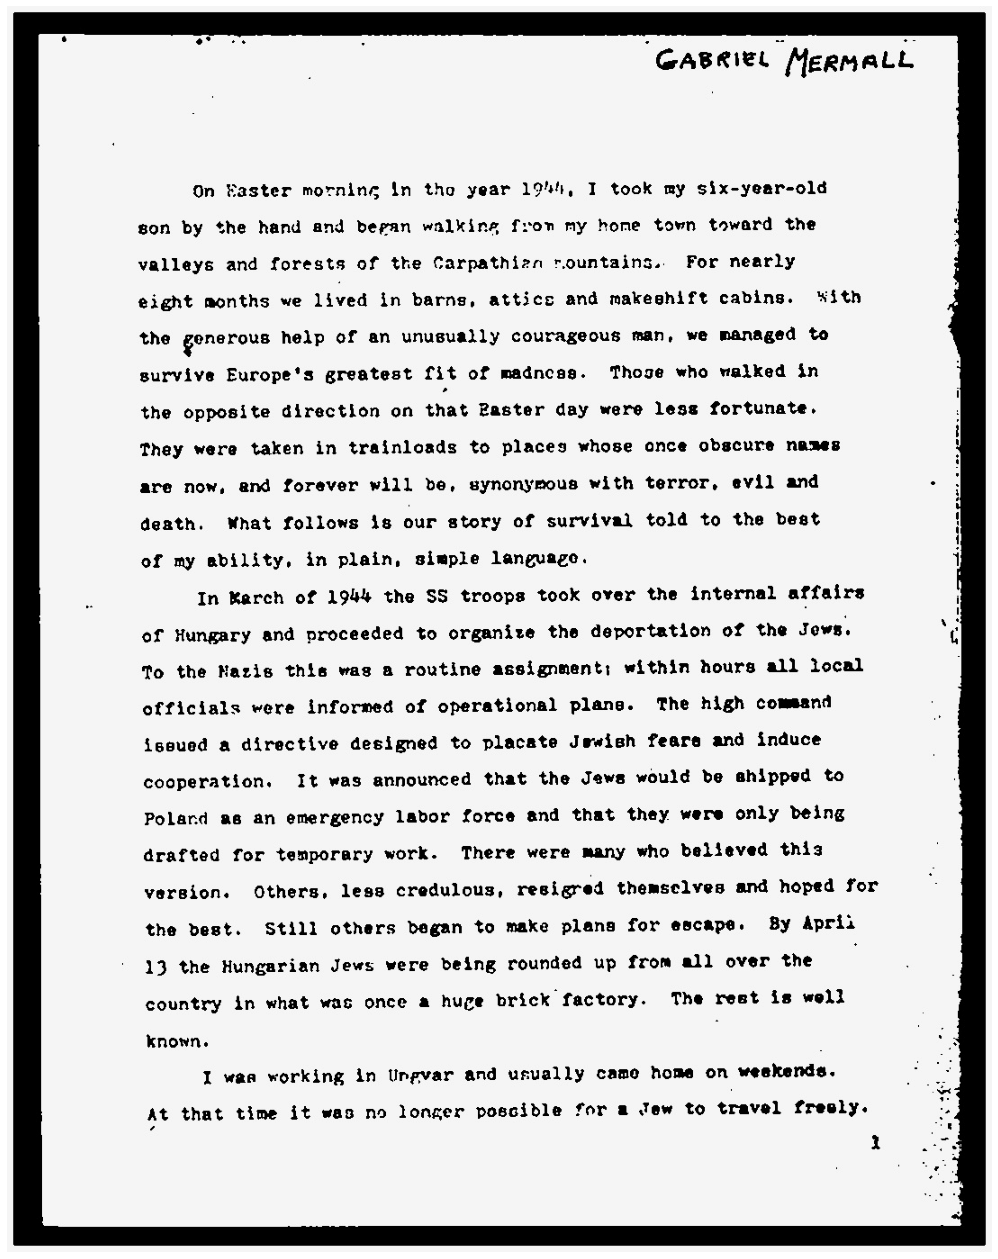

In [60]:
# Mostrando a imagem:

display('images/ex_sem_ruido.jpg')

### 6. Dilatação e erosão:

#### 6.1 Fonte fina:

In [67]:
def fonte_fina(image):
    image = cv2.bitwise_not(image) # Inversão (preto e branco)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image) # Invertendo novamente (ou seja, revertendo)
    return (image)

In [68]:
# Utilizando a função na imagem resultante da redução de ruído:

ex_fonte_fina = fonte_fina(ex_sem_ruido)
cv2.imwrite('images/ex_fonte_fina.jpg', ex_fonte_fina)

True

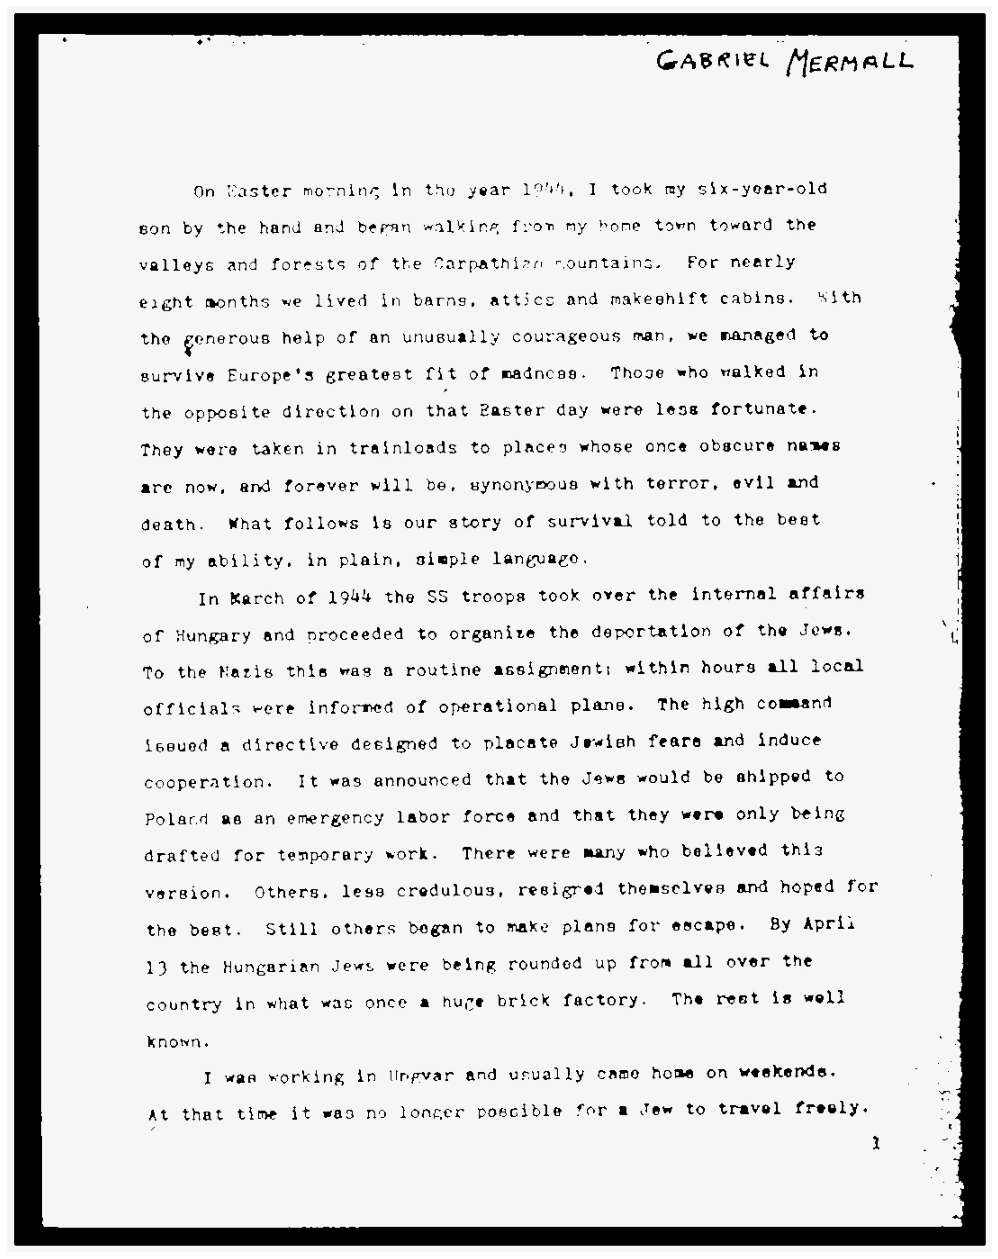

In [69]:
# Mostrando a imagem:

display('images/ex_fonte_fina.jpg')